# Programming Assignment # 4 Clustering

## Student Details

When submitting, fill your full name, your student ID and your NetID in this cell. Note that this is a markdown cell! 

Student Full Name: Angad Tarikere Manjunatha

ID: 100171885  

Team Mate name : Karthik Natarajan

ID: 1001872904


Team Mate name : Rishitha Patel

ID: 1001863136

## Rules

1. Work is to be done in a team
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa3.ipynb' and submit it. 
5. Do not alter the dataset name.
6. Please dont ask any details specific to the project like "How to plot XYZ ? What parameters are to be used? " and so on..
7. Report is not required for this assignment. If you want to document a function or a process, just comment or use markup cell.
8. Please dont send images of your visualizations to verify whether they are right or not before submission deadline.



## Assignment Details

The purpose of this assignment is to cluster  using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


Your dataset is given as 3 files . 




You need to submit this ipython file after renaming it. 

Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.
You need to submit this ipython file after renaming it. 

Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.



In [65]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

In [66]:
# Import required Python packages here
#Seaborn,numpy,pandas,sklearn,matplotlib only

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import cluster
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

In [67]:
#Reading the dataset  
data = pd.read_csv("College.csv")

In [68]:
# Mapping target variable to 1 and 0
data = data.iloc[: , 1:]
data['Private'] = data.Private.replace({'Yes':1, 
         'No':0})
# Assigning target label to Y
Y = data['Private']

In [69]:
#Printing the complete dataframe
data

Private   Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
0          1   1660    1232     721         23         52         2885   
1          1   2186    1924     512         16         29         2683   
2          1   1428    1097     336         22         50         1036   
3          1    417     349     137         60         89          510   
4          1    193     146      55         16         44          249   
..       ...    ...     ...     ...        ...        ...          ...   
772        0   2197    1515     543          4         26         3089   
773        1   1959    1805     695         24         47         2849   
774        1   2097    1915     695         34         61         2793   
775        1  10705    2453    1317         95         99         5217   
776        1   2989    1855     691         28         63         2988   

     P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  Terminal  \
0            537      7440        3300    450      2200   70        78   
1           1227     12280        6450    750      1500   29        30   
2             99     11250        3750    400      1165   53        66   
3             63     12960        5450    450       875   92        97   
4            869      7560        4120    800      1500   76        72   
..           ...       ...         ...    ...       ...  ...       ...   
772         2029      6797        3900    500      1200   60        60   
773         1107     11520        4960    600      1250   73        75   
774          166      6900        4200    617       781   67        75   
775           83     19840        6510    630      2115   96        96   
776         1726      4990        3560    500      1250   75        75   

     S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0         18.1           12    7041         60  
1         12.2           16   10527         56  
2         12.9           30    8735         54  
3          7.7           37   19016         59  
4         11.9            2   10922         15  
..         ...          ...     ...        ...  
772       21.0           14    4469         40  
773       13.3           31    9189         83  
774       14.4           20    8323         49  
775        5.8           49   40386         99  
776       18.1           28    4509         99  

[777 rows x 18 columns]

In [70]:
datacheck=data.isnull().sum()
print(datacheck)

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64


In [71]:
#########################begin code for Task 1-a

# Calculating SSE for each value of k and storing in list. SSE is divided by 10000000 for ease of plotting graph
Sum_of_squared = []
K = range(1,11)
for k in K:
    kmeansmodel = KMeans(n_clusters=k)
    kmeansmodel = kmeansmodel.fit(data)
    Sum_of_squared.append(kmeansmodel.inertia_)
    
plt.plot(K, Sum_of_squared, 'bx-')
plt.xlabel('no of clusters')
plt.ylabel('Sum_of_squared')
plt.title('Elbow Method ')
plt.show()



print("As we can see in the above graph the SSE starts decreasing as the number of k increases and the point where the SSE starts rapidely decreasing(the elbow) is the best k which is 3. ")

#########################begin code for Task 1-a
#########################begin code for Task 1-a


#########################begin code for Task 1-a



As we can see in the above graph the SSE starts decreasing as the number of k increases and the point where the SSE starts rapidely decreasing(the elbow) is the best k which is 3. 


### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [72]:
###################begin code for Task 1-b-1:

#  Split the dataset 70% for training and 30% for testing

X = data.drop(['Private'], axis=1, inplace=False)
x_training, x_testing, y_training, y_testing = train_test_split(X, Y,test_size = 0.3,random_state = 0)

###################end code for Task 1-b-1

In [73]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels

# Import PCA
from sklearn.decomposition import PCA


# Createing the KMeans model
model = cluster.KMeans(init='k-means++', n_clusters=2, random_state=0).fit(x_training)
y_pred=model.predict(x_testing)

# Model and fit the training data to the PCA model
X_train_pca= PCA(n_components=2).fit_transform(x_training)

# Compute cluster centers and predict cluster index for each sample 
cluster_center = model.cluster_centers_
train_cluster = model.fit_predict(x_training)

print(cluster_center)
print(train_cluster)





[[1.90201266e+03 1.33878903e+03 5.00877637e+02 2.55210970e+01
  5.40042194e+01 2.24818354e+03 6.24793249e+02 1.04321055e+04
  4.32250844e+03 5.49597046e+02 1.29785865e+03 7.03354430e+01
  7.79050633e+01 1.40670886e+01 2.26244726e+01 9.02597468e+03
  6.50527426e+01]
 [1.08870000e+04 6.99753623e+03 2.83400000e+03 4.14347826e+01
  6.98550725e+01 1.45882899e+04 2.94834783e+03 1.06194638e+04
  4.63807246e+03 5.94101449e+02 1.79859420e+03 8.61739130e+01
  9.12753623e+01 1.40536232e+01 1.97681159e+01 1.33832029e+04
  6.52898551e+01]]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1
 0 1 0 1 0 0 0 0 

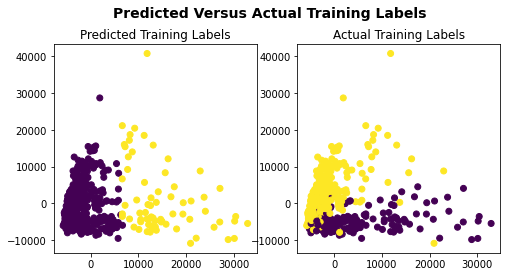

In [74]:
# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

# Create a plot with subplots
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjusting layout
fig.suptitle('Predicted Versus Actual Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Adding scatterplots to the subplots 
ax[0].scatter(x, y, c=train_cluster)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(x, y, c=y_training)
ax[1].set_title('Actual Training Labels')

# Show the plots
plt.show()


###################end code for Task 1-b-2

Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

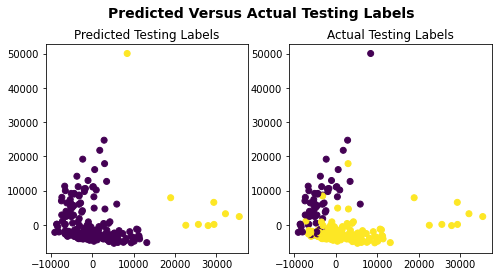

In [75]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels


# predict cluster index for each sample 
test_cluster = model.fit_predict(x_testing)

# Model and fit the data to the PCA model
X_train_pca = PCA(n_components=2).fit_transform(x_testing)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust layout
fig.suptitle('Predicted Versus Actual Testing Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(x, y, c=test_cluster)
ax[0].set_title('Predicted Testing Labels')
ax[1].scatter(x, y, c=y_testing)
ax[1].set_title('Actual Testing Labels')

# Show the plots
plt.show()
###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

In [76]:
###################begin code for Task 1-b-4: Print out a confusion matrix

print(metrics.confusion_matrix(y_testing, y_pred))

###################end code for Task 1-b-4

[[ 39  23]
 [162  10]]


# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [77]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score


## Calculate pairwise distance matrix for x_training
pdm_train = pairwise_distances(x_training)

## Model and fit the training data to the AgglomerativeClustering model
clusters = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete')
cosine_cluster = clusters.fit_predict(x_training)
cosine_f1 = metrics.f1_score(y_training, cosine_cluster)
## complete linkage + cosine


## Model and fit the training data to the AgglomerativeClustering model
clusters = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
euclidean_cluster = clusters.fit_predict(x_training)
euclidean_f1 = metrics.f1_score(y_training, euclidean_cluster)
## complete linkage + euclidean


## Model and fit the training data to the AgglomerativeClustering model
clusters = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='complete')  
manhattan_cluster = clusters.fit_predict(x_training)
manhattan_f1 = metrics.f1_score(y_training, manhattan_cluster)
## complete linkage + manhattan

## Model and fit the training data to the AgglomerativeClustering model
clusters = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')  
average_cosine_cluster = clusters.fit_predict(x_training)
average_cosine_f1 = metrics.f1_score(y_training, average_cosine_cluster)
## average linkage + cosine


## Model and fit the training data to the AgglomerativeClustering model
clusters = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')  
average_euclidean_cluster = clusters.fit_predict(x_training)
average_euclidean_f1 = metrics.f1_score(y_training, average_euclidean_cluster)
## average linkage + euclidean


## Model and fit the training data to the AgglomerativeClustering model
clusters = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')  
eaverage_manhattan_cluster = clusters.fit_predict(x_training)
average_manhattan_f1 = metrics.f1_score(y_training, eaverage_manhattan_cluster)
## average linkage + manhattan


print("F1-score for complete linkage + cosine", cosine_f1)
print("F1-score for complete linkage + euclidean", euclidean_f1)
print("F1-score for complete linkage + manhattan", manhattan_f1)
print("F1-score for average linkage + cosine", average_cosine_f1)
print("F1-score for average linkage + euclidean", average_euclidean_f1)
print("F1-score for average linkage + manhattan", average_manhattan_f1)


print("the best Hierarchical Agglomerative Clustering Model is cosine")


###################end code for Task 2-a

F1-score for complete linkage + cosine 0.04462474645030426
F1-score for complete linkage + euclidean 0.010126582278481015
F1-score for complete linkage + manhattan 0.027027027027027025
F1-score for average linkage + cosine 0.9290953545232274
F1-score for average linkage + euclidean 0.010126582278481015
F1-score for average linkage + manhattan 0.059259259259259255
the best Hierarchical Agglomerative Clustering Model is cosine


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pcafrom Task 1-b-2). 

In [80]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels


# Visualize the predicted training labels versus actual training labels. 



# Visualize the predicted training labels versus actual training labels. 
# Model and fit the data to the PCA model
X_train_pca = PCA(2)

f, axs = plt.subplots(figsize=(12,6))
plt.subplot(1,2,1)

plot_columns = X_train_pca.fit_transform(x_training)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=average_cosine_cluster)
plt.title('predicted training labels vs actual training labels')
#plt.show()

plt.subplot(1,2,2)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=y_training)
#plt.show()

###################end code for Task 2-b

NameError: name 'X_train' is not defined

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

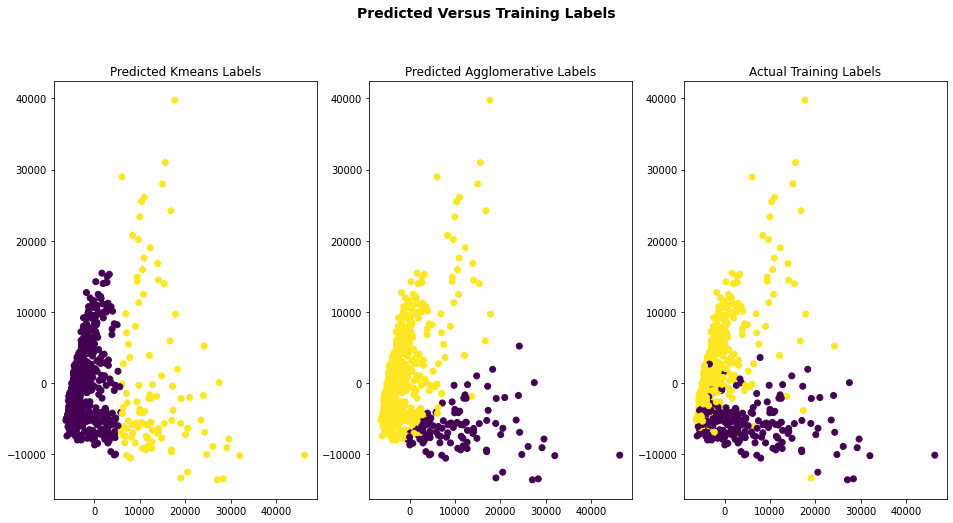

In [79]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)

# Create the KMeans model
model = cluster.KMeans(init='k-means++', n_clusters=2, random_state=0).fit(X)
# y_pred=model.predict(X)

# Compute cluster centers and predict cluster index for each sample 
kmeans_cluster = model.fit_predict(X)

### Agglomerative Clustering
# Calculate pairwise distance matrix for X
pdm_train = pairwise_distances(X)

# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
agglo_cluster = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')  
agglo_cluster = agglo_cluster.fit_predict(X)
# average_cosine_f1 = metrics.f1_score(y_training, average_cosine_cluster)

### Visualize Clusters
# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 

#  Model and fit the data to the PCA model
X_train_pca = PCA(n_components=2).fit_transform(X)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 3, figsize=(16, 8))

# Adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(x, y, c=kmeans_cluster)
ax[0].set_title('Predicted Kmeans Labels')
ax[1].scatter(x, y, c=agglo_cluster)
ax[1].set_title('Predicted Agglomerative Labels')
ax[2].scatter(x, y, c=Y)
ax[2].set_title('Actual Training Labels')

# Show the plots
plt.show()


###################end code for Task 3-a

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

In [ ]:
###################begin code for Task 3-b

print("KMeans Clustering")
print(metrics.confusion_matrix(Y, kmeans_cluster))
print(classification_report(Y, kmeans_cluster))

print("Agglomerative Clustering")
print(metrics.confusion_matrix(Y, agglo_cluster))
print(classification_report(Y, agglo_cluster))

print("The accuracy of the model is good when the data is trained with Agglomerative Clustering compared to K-Means Clustering")

###################end code for Task 3-b

KMeans Clustering
[[138  74]
 [531  34]]
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777

Agglomerative Clustering
[[110 102]
 [  6 559]]
              precision    recall  f1-score   support

           0       0.95      0.52      0.67       212
           1       0.85      0.99      0.91       565

    accuracy                           0.86       777
   macro avg       0.90      0.75      0.79       777
weighted avg       0.87      0.86      0.85       777

Accuracy of Agglomerative Clustering is more than KMeans Clustering


## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[45 points] Task 1:</b>  

    [15 points] Task 1-a: Determine “k” value from the elbow method

    [30 points] Task 1-b: Visualization for K-Means Clustering

        [05 points] Task 1-b-1: Split the dataset 
    
        [10 points] Task 1-b-2: Visualize the predicted training vs actual training labels 
    
        [10 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels
    
        [05 points] Task 1-b-4: Print out a confusion matrix
    


<b>[50 points] Task 2:</b>  

    [35 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [15 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering



<b>[20 points] Task 3 (BONUS):</b> 

    Task 3-a: 10 points

    Task 3-b: 10 points